Done by: Shivang Kainthola https://www.linkedin.com/in/shivang-kainthola-2835151b9/

The objective of this project is to predict the price of a house, on the basis of given features provided.

The following dataset has been used for this project :
    
https://www.kaggle.com/datasets/shree1992/housedata



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.linear_model import RidgeCV

Section 1 : Exploratory Data Analysis and pre-processing
    
We will read the dataset, analyse the values, identify useful variables, and clean the data as required.

In [2]:
pricedata=pd.read_csv("data.csv")
pricedata.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


Clearly, 'price' can be the target variable, so we can prefer regression techniques.

To check the data types for each column :

In [3]:
pricedata.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

To summarise the entire dataset values, first for numerical values

In [4]:
pricedata.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


and for catergorical values :

In [5]:
pricedata.describe(include="object")

,date,street,city,statezip,country
count,4600,4600,4600,4600,4600
unique,70,4525,44,77,1
top,2014-06-23 00:00:00,2520 Mulberry Walk NE,Seattle,WA 98103,USA
freq,142,4,1573,148,4600


Checking for null data:

In [6]:
pricedata.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

The dataset has no null values.

In [7]:
pricedata.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

To find correlation among attributes, using Pearson coefficent (gives values between +1 and -1) :

In [8]:
pricedata.corr(method='pearson')

C:\Users\Asus\AppData\Local\Temp\ipykernel_24448\3456885043.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pricedata.corr(method='pearson')


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


C:\Users\Asus\AppData\Local\Temp\ipykernel_24448\606827974.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(pricedata.corr(),cmap="Blues")


<AxesSubplot: >

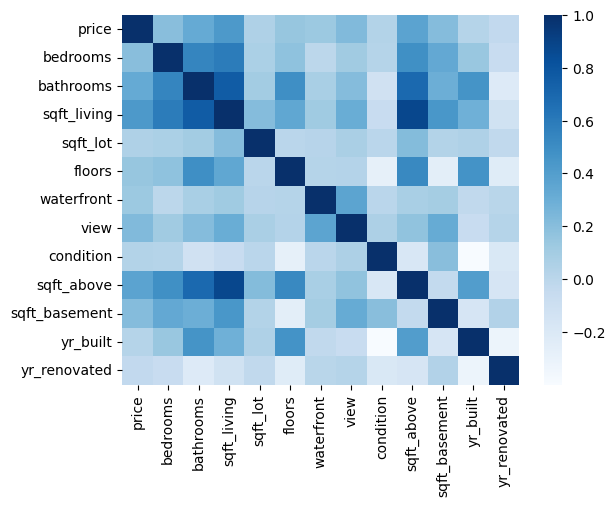

In [9]:
sns.heatmap(pricedata.corr(),cmap="Blues")

From the dataset, the target variable being 'price', we have to select numerical and categorical variables to accurately
predict it without any noise.

For the numerical variables, we will consider the given Pearson correlation value, and keeping in mind the current values,
we will select those above +0.20 and below -0.50.
This is obtained by :

In [10]:
numeric_vars = list(pricedata.corr()["price"][(pricedata.corr()["price"]>0.10) | (pricedata.corr()["price"]<-0.50)].index)

print(numeric_vars)

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'sqft_above', 'sqft_basement']


C:\Users\Asus\AppData\Local\Temp\ipykernel_24448\3787433713.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  numeric_vars = list(pricedata.corr()["price"][(pricedata.corr()["price"]>0.10) | (pricedata.corr()["price"]<-0.50)].index)


To show correlation between all selected numeric variables :

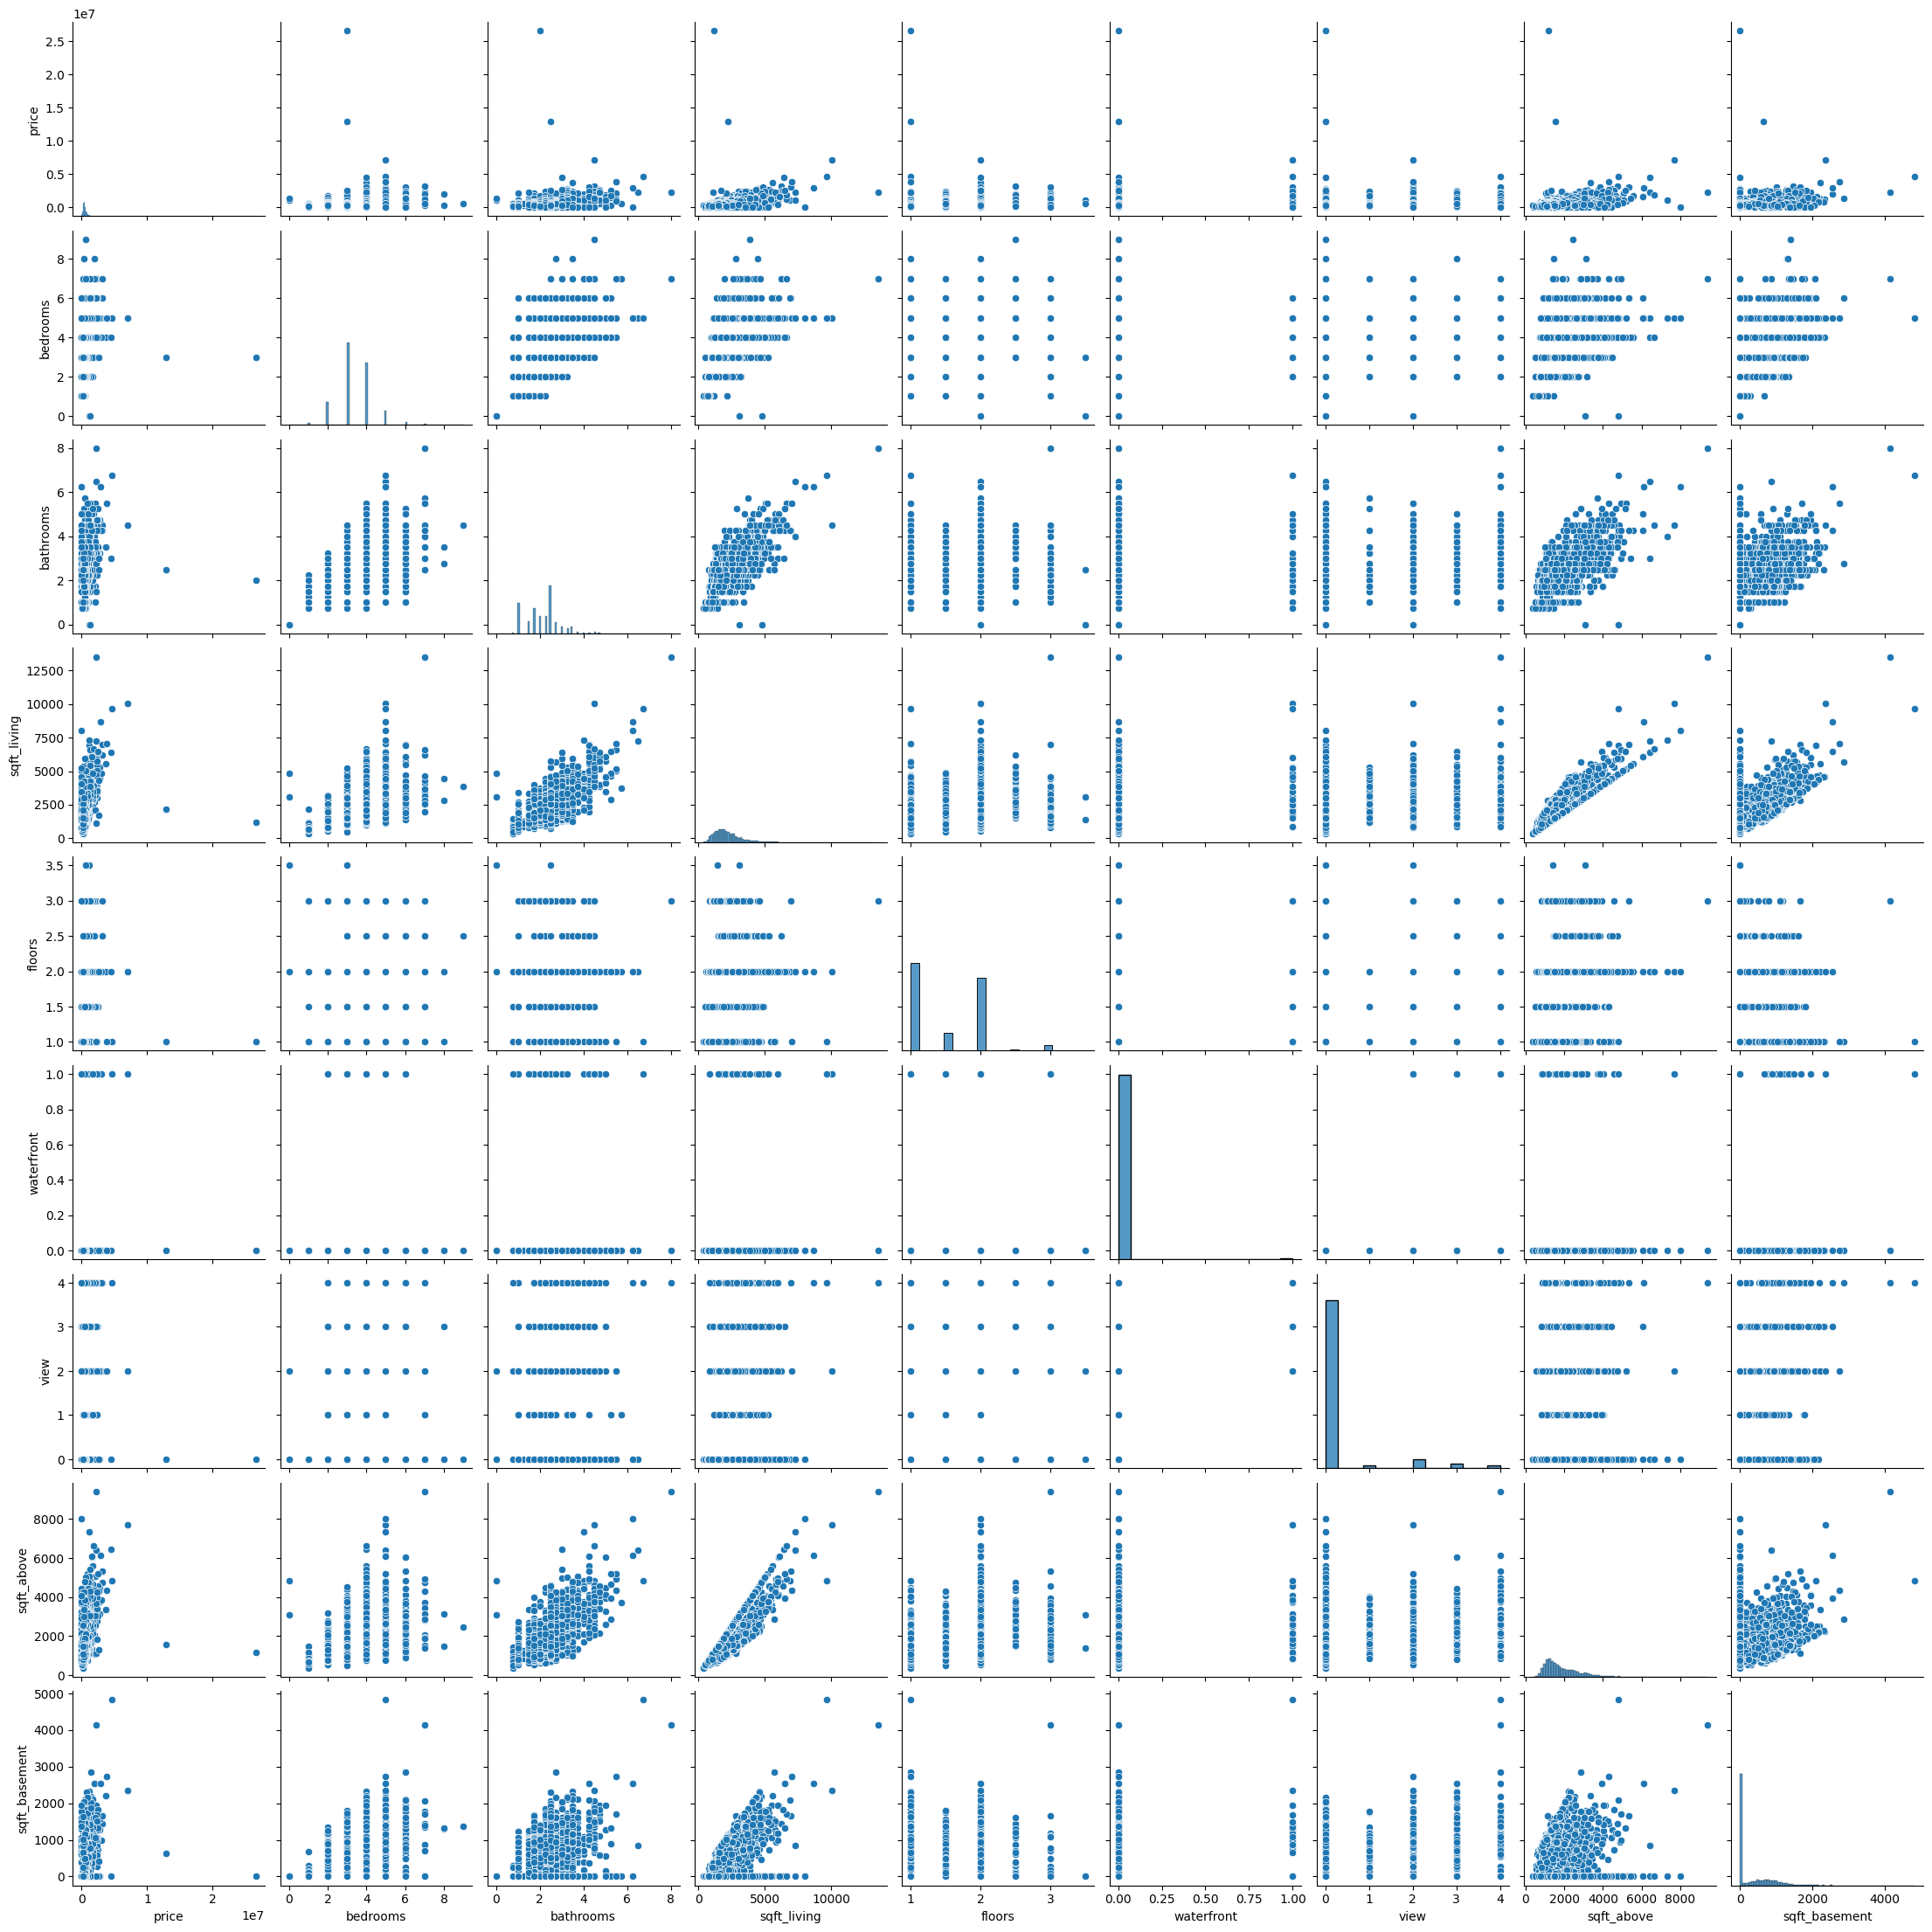

In [11]:
sns.pairplot(pricedata[numeric_vars])

To examine categorical variables :

In [12]:
cat_vars=[x for x in dict(pricedata.dtypes) if pricedata.dtypes[x] =='object']
cat_data=pricedata[cat_vars]
cat_data.describe(include='object')

,date,street,city,statezip,country
count,4600,4600,4600,4600,4600
unique,70,4525,44,77,1
top,2014-06-23 00:00:00,2520 Mulberry Walk NE,Seattle,WA 98103,USA
freq,142,4,1573,148,4600


The date,street and streetzip columns are seemingly irrelevant, and so, can be removed.

In [13]:
cat_vars.remove('date') 
cat_vars.remove('street')
cat_vars.remove('statezip')


Now, we will prepare the data for training/testing. 

All relevant numeric and categorical attributes are taken in a new dataframe.

In [14]:
relevantdata= pricedata.copy()

relevant_cols= numeric_vars + cat_vars

relevantdata1=relevantdata[relevant_cols]

The categorical values must be converted to numerical in order to proceed further.

get_dummies method was tried but lead to problems.

pd.factorise() has been implemented to convert it.

In [15]:
relevantdata1['city']=pd.factorize(relevantdata1['city'])[0]
relevantdata1['country']=pd.factorize(relevantdata1['country'])[0]

C:\Users\Asus\AppData\Local\Temp\ipykernel_24448\2924767697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevantdata1['city']=pd.factorize(relevantdata1['city'])[0]
C:\Users\Asus\AppData\Local\Temp\ipykernel_24448\2924767697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevantdata1['country']=pd.factorize(relevantdata1['country'])[0]


Now, all values must be standardised.

StandardScaler() removes the mean and scales each feature/variable to unit variance.

The idea behind the StandardScaler is that variables that are measured at different scales do not contribute equally to the 
fit of the model and the learning function of the model and could end up creating a bias.


In [16]:
relevantdata1.drop_duplicates(inplace=True)

scaler=StandardScaler()

relevantdata1[relevant_cols]=scaler.fit_transform(relevantdata1[relevant_cols])

C:\Users\Asus\AppData\Local\Temp\ipykernel_24448\4021453304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevantdata1.drop_duplicates(inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_24448\4021453304.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevantdata1[relevant_cols]=scaler.fit_transform(relevantdata1[relevant_cols])


The matrix so achieved must be converted back to a dataframe :

In [17]:
relevantdata=pd.DataFrame(relevantdata1,columns=relevant_cols)

relevantdata

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement,city,country
0,-0.423868,-0.442787,-0.844542,-0.831280,-0.02146,-0.085051,-0.309379,-0.566104,-0.672995,-0.933590,0.0
1,3.247746,1.759168,0.431784,1.567581,0.90882,-0.085051,4.827368,1.788480,-0.069839,-0.824459,0.0
2,-0.372455,-0.442787,-0.206379,-0.218584,-0.95174,-0.085051,-0.309379,0.118233,-0.672995,-0.715327,0.0
3,-0.234171,-0.442787,0.112703,-0.145891,-0.95174,-0.085051,-0.309379,-0.960468,1.481133,-0.606196,0.0
4,-0.003698,0.658191,0.431784,-0.208199,-0.95174,-0.085051,-0.309379,-0.798083,1.050307,-0.497065,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4595,-0.432437,-0.442787,-0.525460,-0.654740,-0.95174,-0.085051,-0.309379,-0.368922,-0.672995,-0.824459,0.0
4596,-0.031473,-0.442787,0.431784,-0.706664,0.90882,-0.085051,-0.309379,-0.426917,-0.672995,-0.606196,0.0
4597,-0.239660,-0.442787,0.431784,0.902962,0.90882,-0.085051,-0.309379,1.370918,-0.672995,1.030775,0.0
4598,-0.618175,0.658191,-0.206379,-0.052429,-0.95174,-0.085051,-0.309379,-0.879275,1.524216,-0.824459,0.0


Section 2 : Model Training and Testing

The dataset is split into the input values and the target variable 'price' :

In [18]:
x1=relevantdata.drop('price',axis=1)

y=relevantdata[['price']]

Now, we will split it into training and testing data :

In [19]:
tr_x,tst_x,tr_y,tst_y=train_test_split(x1,y)


We will now apply a variety of models :

1. Linear Regression

In [20]:
lin=LinearRegression()
lin.fit(tr_x,tr_y)
predictions=lin.predict(tst_x)

The score obtained :

In [21]:
print("Score",lin.score(tst_x,tst_y))

Score 0.5048151977185034


2. Ridge Regression with Leave-One-Out Cross Validation

In [22]:
lin_ridgecv=RidgeCV()
lin_ridgecv.fit(tr_x,tr_y)
predictions1=lin_ridgecv.predict(tst_x)

The score obtained :

In [23]:

print("Score :",lin_ridgecv.score(tst_x,tst_y))


Score : 0.5135770851610719


3. Random Forest Regressor

In [24]:
regressor = RandomForestRegressor(max_depth=3, random_state=0)
regressor.fit(tr_x,tr_y)
predictions2=regressor.predict(tst_x)

C:\Users\Asus\AppData\Local\Temp\ipykernel_24448\2031978905.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(tr_x,tr_y)


The score obtained is :

In [25]:

print("Score :",regressor.score(tst_x,tst_y))


Score : 0.48485826273103083
